In [1]:
import numpy as np
from skimage.io import imshow, imread
import matplotlib.pyplot as plt

In [2]:
def my_gaussian_kernel(size, sigma):
    xa = np.linspace(-(size // 2), size // 2, size)
    xb = np.linspace(-(size // 2), size // 2, size)

    x, y = np.meshgrid(xa, xb, sparse=True)
    kernel = (1 / (np.sqrt(2 * np.pi * sigma))) * np.exp(-(x*x + y*y) / (2. * sigma * sigma))
    
    # print(kernel.sum())
    kernel /= kernel.sum()

    return kernel

In [3]:
my_gaussian_kernel(5, 1.0)

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

In [4]:
def rotate_kernel(image):
    for i in range(int(image.shape[0] / 2)):
        for j in range(int(image.shape[1])):
            temp = image[i][j]
            image[i][j] = image[image.shape[0]-1-i][image.shape[1]-1-j]
            image[image.shape[0]-1-i][image.shape[1]-1-j] = temp
    j = 0
    while(j < int(image.shape[1]/2)):
        temp = image[int(image.shape[0]/2)][j] 
        image[int(image.shape[0]/2)][j] = image[int(image.shape[0] / 2)][int(image.shape[1]-j-1)]
        image[int(image.shape[0] / 2)][int(image.shape[1]-j-1)] = temp
        j += 1
    return image

In [5]:
def pool_region2(image, pad_h, pad_w, image_row, image_col, kernel, stride):
    row, col = image.shape
    ind_x = np.arange(pad_h, image_row-(kernel[0] - stride[0]+1), stride[0], dtype=np.int32)
    ind_y = np.arange(pad_w, image_col-(kernel[0] - stride[0]+1), stride[0], dtype=np.int32)

    for x, i in enumerate(ind_x):
        for y, j in enumerate(ind_y):
            # print(image[i - pad_h : i + pad_h + kernel[0], j - pad_w : j + pad_w + kernel[1]])
            yield image[i - pad_h : i + pad_h + kernel[0], j - pad_w : j + pad_w + kernel[1]], x, y

In [7]:
def convolution2D2(image, kernel, stride, padding):
  row = int(np.ceil((image.shape[0] - kernel.shape[0] + 2 * padding)) / stride[0])
  col = int(np.ceil((image.shape[1] - kernel.shape[1] + 2 * padding)) / stride[1])

  output = np.zeros((row+1, col+1))
  print(output.shape)

  kernel_row, kernel_col = kernel.shape
  
  pad_h = int((kernel_row - 1) / 2)
  pad_w = int((kernel_col - 1) / 2)

  if padding:
    padded_image = np.zeros((image.shape[0] + (2*pad_h), image.shape[1] + (2 * pad_w)))
    padded_image[pad_h : image.shape[0] + pad_h, pad_w : image.shape[1] + pad_w] = image

  kernel = rotate_kernel(kernel)

  for im_region, i, j in pool_region2(image, 0, 0, image.shape[0], image.shape[1], kernel.shape, stride):
    # print(i, j)
    output[i, j] = np.sum(kernel * im_region)

  return output

In [11]:
img = imread("/content/Grasshopper2.jpg")
print(img[:, :, 0].shape)
kernel = my_gaussian_kernel(3, 1.0)

# Gaussian kernel of 3X3 and stride of (2, 2) for down-sampling by a factor of 2
img_g_1 = convolution2D2(img[:, :, 0], kernel, [2, 2], False)
img_g_2 = convolution2D2(img_g_1, kernel, [2, 2], False)
img_g_3 = convolution2D2(img_g_2, kernel, [2, 2], False)
img_g_4 = convolution2D2(img_g_3, kernel, [2, 2], False)

(512, 512)
(255, 255)
(127, 127)
(63, 63)
(31, 31)


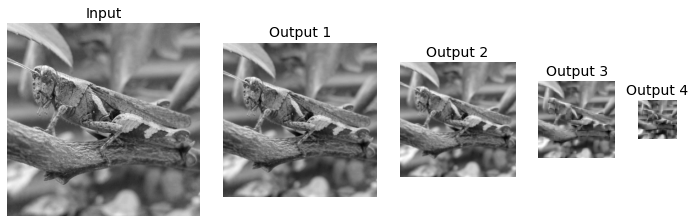

In [12]:
import matplotlib as mpl
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=5, width_ratios=[5, 4, 3, 2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(img[:, :, 0], cmap="gray")  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output 1", fontsize=14)
ax2.imshow(img_g_1, cmap="gray")  # plot the output for the 1st image
ax2.axis("off")
ax2 = fig.add_subplot(gs[0, 2])
ax2.set_title("Output 2", fontsize=14)
ax2.imshow(img_g_2, cmap="gray")  # plot the output for the 1st image
ax2.axis("off")
ax2 = fig.add_subplot(gs[0, 3])
ax2.set_title("Output 3", fontsize=14)
ax2.imshow(img_g_3, cmap="gray")  # plot the output for the 1st image
ax2.axis("off")
ax2.axis("off")
ax2 = fig.add_subplot(gs[0, 4])
ax2.set_title("Output 4", fontsize=14)
ax2.imshow(img_g_4, cmap="gray")  # plot the output for the 1st image
ax2.axis("off")
plt.show()